In [1]:
import pandas as pd
import geopandas as gpd
import descartes
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
%matplotlib inline

ModuleNotFoundError: No module named 'geopandas'

In [2]:
df = pd.read_csv("http://cluster.earlham.edu/~apc0013/Chicago_crime.csv")

In [3]:
pd.set_option('display.max_columns', 500)
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,2746413,HJ384532,05/20/2003 08:00:00 PM,072XX S FAIRFIELD AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,831,8.0,18.0,66.0,05,1159293.0,1856544.0,2003,02/28/2018 03:56:25 PM,41.762076,-87.691736,"(41.762075613, -87.691735556)"
1,2746414,HJ385055,05/24/2003 09:25:00 PM,015XX W ROOSEVELT RD,0420,BATTERY,AGGRAVATED:KNIFE/CUTTING INSTR,SIDEWALK,False,False,1231,12.0,2.0,28.0,04B,1166352.0,1894784.0,2003,02/28/2018 03:56:25 PM,41.866863,-87.664773,"(41.866863003, -87.664772948)"
2,2746415,HJ384304,05/24/2003 01:10:00 PM,062XX S CLAREMONT AVE,031A,ROBBERY,ARMED: HANDGUN,STREET,False,False,825,8.0,15.0,66.0,03,1161795.0,1863307.0,2003,02/28/2018 03:56:25 PM,41.780583,-87.682378,"(41.78058266, -87.682377751)"
3,2746416,HJ384255,05/24/2003 02:00:00 PM,031XX N CLARK ST,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,True,False,1932,19.0,44.0,6.0,06,1170274.0,1920971.0,2003,02/28/2018 03:56:25 PM,41.938637,-87.649609,"(41.938636968, -87.64960867)"
4,2746418,HJ385442,05/25/2003 02:22:00 AM,031XX N BROADWAY,0810,THEFT,OVER $500,STREET,False,False,2332,19.0,44.0,6.0,06,1171708.0,1920869.0,2003,02/28/2018 03:56:25 PM,41.938326,-87.644341,"(41.938325571, -87.644341433)"


In [31]:
df.tail()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,geometry
6836018,10782470,HZ549950,12/13/2016 08:00:00 AM,0000X N TALMAN AVE,0810,THEFT,OVER $500,STREET,False,False,1222,12.0,2.0,27.0,06,1158841.0,1900170.0,2016,01/04/2017 03:44:17 PM,41.881800,-87.692199,"(41.881799914, -87.692199071)",POINT (-87.692199071 41.881799914)
6836019,2746408,HJ385028,05/24/2003 08:55:00 PM,009XX W RANDOLPH ST,0530,ASSAULT,AGGRAVATED: OTHER DANG WEAPON,RESIDENCE PORCH/HALLWAY,False,False,1212,12.0,27.0,28.0,04A,1170259.0,1901191.0,2003,02/28/2018 03:56:25 PM,41.884360,-87.650243,"(41.884359885, -87.65024276)",POINT (-87.65024276 41.884359885)
6836020,2746409,HJ383258,05/23/2003 10:15:00 PM,037XX W 58TH ST,0520,ASSAULT,AGGRAVATED:KNIFE/CUTTING INSTR,RESIDENCE,False,False,822,8.0,14.0,62.0,04A,1152422.0,1865887.0,2003,02/28/2018 03:56:25 PM,41.787852,-87.716673,"(41.787852145, -87.716673352)",POINT (-87.716673352 41.787852145)
6836021,2746410,HJ381858,05/23/2003 12:00:00 PM,017XX N WINNEBAGO AVE,0810,THEFT,OVER $500,STREET,True,False,1434,14.0,1.0,24.0,06,1161253.0,1911546.0,2003,02/28/2018 03:56:25 PM,41.912967,-87.683026,"(41.912966786, -87.683025626)",POINT (-87.683025626 41.912966786)
6836022,2746411,HJ385587,05/24/2003 04:00:00 AM,075XX S YALE AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,623,6.0,17.0,69.0,26,1175813.0,1854978.0,2003,02/28/2018 03:56:25 PM,41.757424,-87.631235,"(41.757424249, -87.631234642)",POINT (-87.63123464200001 41.757424249)


In [6]:
df.shape

(6836023, 22)

In [7]:
df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [32]:
df['Primary Type'].value_counts()

THEFT                                1439300
BATTERY                              1248292
CRIMINAL DAMAGE                       780015
NARCOTICS                             716044
ASSAULT                               425168
OTHER OFFENSE                         424663
BURGLARY                              391519
MOTOR VEHICLE THEFT                   317528
DECEPTIVE PRACTICE                    269615
ROBBERY                               258515
CRIMINAL TRESPASS                     195678
WEAPONS VIOLATION                      72568
PROSTITUTION                           68549
PUBLIC PEACE VIOLATION                 48274
OFFENSE INVOLVING CHILDREN             46227
CRIM SEXUAL ASSAULT                    27802
SEX OFFENSE                            25563
INTERFERENCE WITH PUBLIC OFFICER       15584
GAMBLING                               14437
LIQUOR LAW VIOLATION                   14125
ARSON                                  11275
HOMICIDE                                9579
KIDNAPPING

In [19]:
street_map = gpd.read_file('geo_export_96e7b464-746d-4468-9d47-6cf675b6bca6.shp')

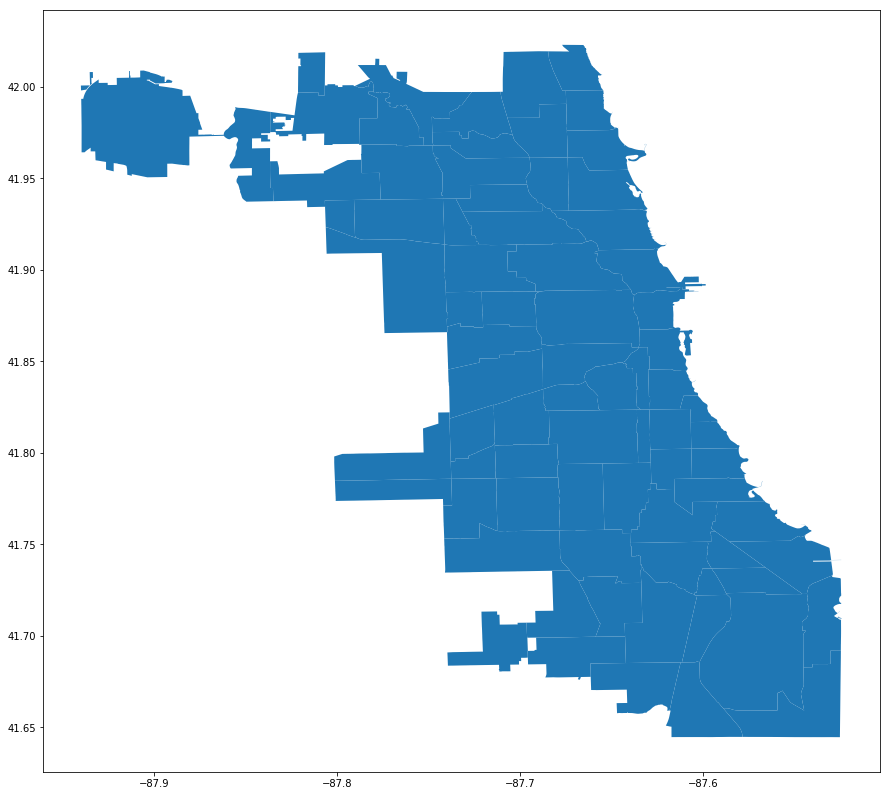

In [20]:
fig, ax = plt.subplots(figsize = (15, 15))
street_map.plot(ax=ax)

In [21]:
geometry = [Point(xy) for xy in zip(df["Longitude"], df["Latitude"])]

AttributeError: 'list' object has no attribute 'shape'

In [22]:
# Projection
crs = {'init' :'epsg:4326'}

In [24]:
len(geometry)

6836023

In [25]:
geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)
geo_df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,geometry
0,2746413,HJ384532,05/20/2003 08:00:00 PM,072XX S FAIRFIELD AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,831,8.0,18.0,66.0,05,1159293.0,1856544.0,2003,02/28/2018 03:56:25 PM,41.762076,-87.691736,"(41.762075613, -87.691735556)",POINT (-87.691735556 41.762075613)
1,2746414,HJ385055,05/24/2003 09:25:00 PM,015XX W ROOSEVELT RD,0420,BATTERY,AGGRAVATED:KNIFE/CUTTING INSTR,SIDEWALK,False,False,1231,12.0,2.0,28.0,04B,1166352.0,1894784.0,2003,02/28/2018 03:56:25 PM,41.866863,-87.664773,"(41.866863003, -87.664772948)",POINT (-87.66477294799999 41.866863003)
2,2746415,HJ384304,05/24/2003 01:10:00 PM,062XX S CLAREMONT AVE,031A,ROBBERY,ARMED: HANDGUN,STREET,False,False,825,8.0,15.0,66.0,03,1161795.0,1863307.0,2003,02/28/2018 03:56:25 PM,41.780583,-87.682378,"(41.78058266, -87.682377751)",POINT (-87.682377751 41.78058266)
3,2746416,HJ384255,05/24/2003 02:00:00 PM,031XX N CLARK ST,0860,THEFT,RETAIL THEFT,SMALL RETAIL STORE,True,False,1932,19.0,44.0,6.0,06,1170274.0,1920971.0,2003,02/28/2018 03:56:25 PM,41.938637,-87.649609,"(41.938636968, -87.64960867)",POINT (-87.64960867000001 41.938636968)
4,2746418,HJ385442,05/25/2003 02:22:00 AM,031XX N BROADWAY,0810,THEFT,OVER $500,STREET,False,False,2332,19.0,44.0,6.0,06,1171708.0,1920869.0,2003,02/28/2018 03:56:25 PM,41.938326,-87.644341,"(41.938325571, -87.644341433)",POINT (-87.64434143299999 41.938325571)


In [29]:
# drop rows with abnormal latitude and longtitude
geo_df = geo_df[geo_df.Latitude > 41] 
geo_df = geo_df[geo_df.Longitude > -89]

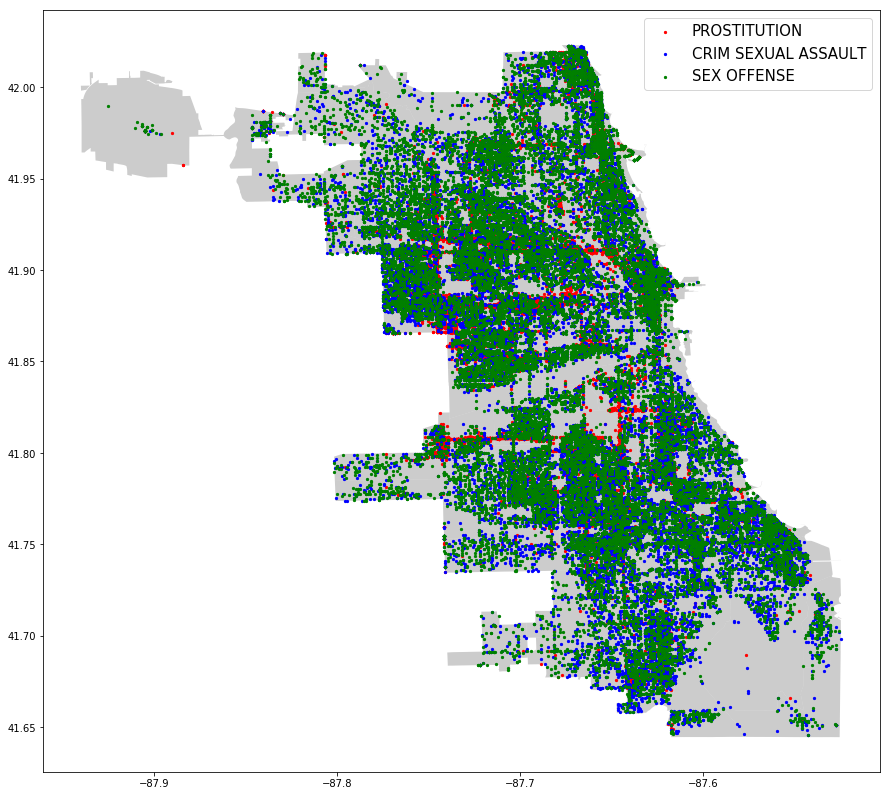

In [42]:
fig, ax = plt.subplots(figsize = (15,15))
street_map.plot(ax = ax, alpha = 0.4, color = "grey")
#geo_df[geo_df['Primary Type'] == "BURGLARY"].plot(ax = ax, markersize = 1, color = 'blue', marker = 'o', label = "BURGLARY")
#geo_df[geo_df['Primary Type'] == "STALKING"].plot(ax = ax, markersize = 10, color = 'red', label = "STALKING")
#geo_df[geo_df['Primary Type'] == "KIDNAPPING"].plot(ax = ax, markersize = 10, color = 'red', label = "KIDNAPPING")
geo_df[geo_df['Primary Type'] == "PROSTITUTION"].plot(ax = ax, markersize = 5, color = 'red', label = "PROSTITUTION")
geo_df[geo_df['Primary Type'] == "CRIM SEXUAL ASSAULT"].plot(ax = ax, markersize = 5, color = 'blue', label = "CRIM SEXUAL ASSAULT")
geo_df[geo_df['Primary Type'] == "SEX OFFENSE"].plot(ax = ax, markersize = 5, color = 'green', label = "SEX OFFENSE")
plt.legend(prop={"size": 15})